In [145]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from zipfile import ZipFile
import urllib.request
import os
from sklearn import naive_bayes

In [7]:
#download and extract datasets
data_url = f'https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip'
file_name = f'C:/Users/Chris/Documents/thinkful/data_sets/sentiment_sentences.zip'
urllib.request.urlretrieve(data_url, file_name)

with ZipFile(file_name, 'r') as zip:    #readmode
    zip.printdir() 
    zip.extractall(path=r'C:\Users\Chris\Documents\thinkful\data_sets\sentiment_sentences') 

File Name                                             Modified             Size
sentiment labelled sentences/                  2016-07-05 11:32:30            0
sentiment labelled sentences/.DS_Store         2016-07-05 11:32:34         6148
__MACOSX/                                      2016-07-05 11:39:00            0
__MACOSX/sentiment labelled sentences/         2016-07-05 11:39:00            0
__MACOSX/sentiment labelled sentences/._.DS_Store 2016-07-05 11:32:34          212
sentiment labelled sentences/amazon_cells_labelled.txt 2016-07-05 11:30:22        58226
sentiment labelled sentences/imdb_labelled.txt 2015-02-14 16:11:16        85285
__MACOSX/sentiment labelled sentences/._imdb_labelled.txt 2015-02-14 16:11:16          212
sentiment labelled sentences/readme.txt        2015-05-30 17:29:46         1070
__MACOSX/sentiment labelled sentences/._readme.txt 2015-05-30 17:29:46          212
sentiment labelled sentences/yelp_labelled.txt 2016-07-05 11:27:32        61320
__MACOSX/._sen

In [25]:
os.chdir('../..')

In [56]:
!cd sentiment_sentences/; ls

The system cannot find the path specified.


In [58]:
os.chdir('sentiment_sentences/')
!ls

sentiment labelled sentences


In [59]:
!mv 'sentiment labelled sentences/' sentiment_labelled_sentences

In [60]:
!ls

sentiment_labelled_sentences


In [70]:
os.chdir(r'sentiment_labelled_sentences/')
!ls

amazon_cells_labelled.txt
imdb_labelled.txt
readme.txt
yelp_labelled.txt


In [137]:
#import data to DF
yelp_df = pd.read_csv('yelp_labelled.txt', sep='\t', header=None)

In [138]:
yelp_df.rename(index=str, columns={0:'sentence', 1:'score'}, inplace=True)

In [139]:
pd.set_option('display.max_colwidth', 120)
yelp_df.head(20)

,sentence,score
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,1
4,The selection on the menu was great and so were the prices.,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.,0
8,The fries were great too.,1
9,A great touch.,1


In [140]:
#build classifier
keywords = ['loved', 'prompt', 'overpriced', 'slow', 'tasty', 'delicious', 'favorite', 'angry', 'great', 'would not']
for kword in keywords:
    yelp_df[kword] = yelp_df.sentence.str.contains(' ' + str(kword) + '[ \.]', case=False)
yelp_df.head()

,sentence,score,loved,prompt,overpriced,slow,tasty,delicious,favorite,angry,great,would not
0,Wow... Loved this place.,1,True,False,False,False,False,False,False,False,False,False
1,Crust is not good.,0,False,False,False,False,False,False,False,False,False,False
2,Not tasty and the texture was just nasty.,0,False,False,False,False,True,False,False,False,False,False
3,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,1,True,False,False,False,False,False,False,False,False,False
4,The selection on the menu was great and so were the prices.,1,False,False,False,False,False,False,False,False,True,False


In [141]:
yelp_df['yelling'] = yelp_df.sentence.str.isupper()

In [142]:
yelp_df.shape

(1000, 13)

In [143]:
yelp_df.iloc[:,1:-1].sum()

score         500.0
loved           9.0
prompt          1.0
overpriced      4.0
slow           10.0
tasty           8.0
delicious      11.0
favorite        2.0
angry           1.0
great          43.0
would not       6.0
dtype: float64

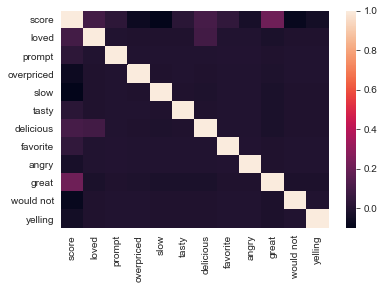

In [144]:
#investigate keywords
sns.set_style(style='dark')
sns.heatmap(yelp_df.corr());

In [152]:
data = yelp_df.iloc[:,1:-1]
target = yelp_df.score

In [154]:
#model
nb_bernou = naive_bayes.BernoulliNB()
nb_bernou.fit(data, target)

#predict
y_predict = nb_bernou.predict(data)

#result
print('model correctly predicted {} and missed {}'.format((y_predict==target).sum(),(y_predict!=target).sum()))

model correctly predicted 1000 and missed0


In [186]:
y_predict_df.dtypes

0    int64
dtype: object

In [178]:
yelp_df[['score']].dtypes

score    int64
dtype: object

In [187]:
y_predict_df = pd.DataFrame(y_predict)
results = pd.merge(yelp_df[['score']], y_predict_df, left_index=True, right_index=True)
results.shape

(0, 2)